## Test a class for the easy retrieval of postgres data via Jupyter widgets


In [1]:
# the following two lines indicate that external functions are auto-reloaded as soon as they change. 
%load_ext autoreload
%autoreload 2
# Print statements 
from __future__ import print_function # Python 2.x

In [2]:
# General stuff:
import sys
import argparse
import os
import json
import numpy as np
import math
import psycopg2
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm_notebook

# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

# External functions from subfolder /database_helpers. 
# as soon as you change something in there and press save, it will auto reload on next execution.
from database_helpers.psql_start import *
from database_helpers.create_tables import *
from database_helpers.write2tables import *
from postgres_analysis_helpers.general import *
from postgres_analysis_helpers.get_data import *
from postgres_analysis_helpers.circstat_functions import *
# register pickle type to retrieve binary data from database
psycopg2.extensions.register_type(psycopg2.extensions.new_type(psycopg2.BINARY.values, 'BINARY-PICKLE', cast_pickle))

sns.set()

Loaded analysis helpers: General
Loaded postgres_analysis_helpers -> general
Loaded postgres_analysis_helpers -> get_data
Loaded postgres_analysis_helpers -> circstat_functions


In [3]:
db_status = test_connect()
if db_status == False:
    print('Grrr... no database connection could be established.')
else:
    print('Yippiyeah! Database connection is established!')

Connecting to the PostgreSQL database...
Yippiyeah! Database connection is established!


In [4]:
data = pd.DataFrame() # create empty dataframe or feed in a base dataframe from before! *

In [5]:
psql = psql_neuroballs(data)

78 animals across 5 experimenters found.
Total # of sessions: 8573 (unique clusters: 15273)


In [6]:
psql.retrieve_data()

VBox(children=(HBox(children=(SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='100px'), options=('ragnihiij', 'davidcr', 'horsto', 'torstsl', 'giuliaq'), value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='100px'), options=('07062', '54417', '54731', '55387', '55579', '55640', '55903', '55905', '55949', '56109', '56276', '56814', '56900', '57088', '57089', '57090', '57835', '57836', '57837', '57841', '58313', '58863', '58907', '59338', '59339', '59379', '59380', '59381', '59383', '59384', '59388', '59389', '59390', '59391', '59392', '59393', '59394', '59399', '70110', '70113', '70114', '70258', '70261', '70375', '70644', '70645', '71343', '71379', '71461', '71462', '71710', '72254', '72255', '72257', '72877', '72878', '73219', '73220', '73221', '73222', '73358', '73359', '73639', '74470', '74471', '74472', '74473', '74565', '74566', '74933', '74935', '74956', '7898', '7945', 'T4683', 'T4743', 'T4934', 'T4935'), value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='200px'), options={'LFP': 'lfp_tb', 'Tracking': 'tracking_tb', 'Spiketimes + Tracking': 'spiketimes_tracking_tb', 'Theta Phase Tuning': 'phase_tuning_tb', 'Interspike interval stats': 'ISI_tb', 'Spiketime autocorr': 'st_autocorr_tb', 'HD tuning stats': 'hd_tuning_tb', 'Ratemaps (KLUSTA)': 'ratemaps_tb', 'Spatial autocorr': 'autocorr_gs_tb', 'Waveforms': 'waveforms_tb', 'Stimulus stats': 'stimulus_tb', 'Stimulus mats': 'stimulus_mat_tb', 'BNT all (NEW!)': 'BNT_tb_screen', 'Waveform stats': 'waveforms_stats_tb'}, value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='240px'), options=('Select a table to the left',), value=()), Textarea(value="NOT LIKE '%las%'", layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='150px'), placeholder='Type filter for session_name'))), HBox(children=(Button(description='Print selection', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to show which entries you marked for retrieval'), Button(description='Get cursor', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to get a cursor instead of a dataset'), Button(button_style='info', description='Get ze data!', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to retrieve data from the database')))), layout=Layout(align_items='stretch', border='', display='flex', flex_flow='columns', height='200px', width='100%'))

Retrieving data ... (Empty dataframe) ...
1688 entries retrieved.


In [7]:
data = psql.data()

In [8]:
data.columns

Index(['animal_id', 'session_name', 'n_drive_user', 'session_ts', 'tetrode_no',
       'cluster_no', 'spike_no', 'mean_freq', 'bins_angle_center_phase',
       'hist_angle_smooth_phase', 'phase_stats_mvl', 'phase_stats_mean',
       'rayleigh_p', 'spike_trig_lfp', 'hist_isi', 'bin_edges_isi',
       'isi_stats_contam', 'isi_stats_contam_perc', 'isi_stats_percent_bursts',
       'st_autocorr', 'theta_idx', 'burst_idx1', 'burst_idx2',
       'bins_angle_center', 'hist_angle_smooth', 'tc_stats_mvl',
       'tc_stats_mean', 'tc_stats_var', 'masked_ratemap', 'mean_wf',
       'informationcontent_bnt', 'tc_stats_hd_peakrate_bnt',
       'gridstats_orientation_bnt', 'numfields_bnt',
       'tc_stats_mean_direction_bnt', 'meanrate_outside_fields_bnt',
       'gridstats_ellipse_bnt', 'peak_rate_bnt', 'gridstats_spacing_bnt',
       'borderscore_bnt', 'informationrate_bnt', 'speedscore_bnt',
       'tc_stats_peakdirection_bnt', 'tc_stats_mvl_bnt', 'coherence_bnt',
       'grid_score_bnt', 'field

In [9]:
data.dropna(subset=['swidth','mean_wf','mean_rate_bnt'],inplace=True)

In [10]:
data = data[data.artefact == 0]

In [11]:
data.head(2)

,animal_id,session_name,n_drive_user,session_ts,tetrode_no,cluster_no,spike_no,mean_freq,bins_angle_center_phase,hist_angle_smooth_phase,...,autocorr_bnt,occupancy_map_bnt,hist_angle_smooth_bnt,bins_angle_center_bnt,params_bnt,calbindin_dist_bnt,artefact,idx_max_wf,idx_min_wf,swidth
0,74471,05092017s1,horsto,2017-09-05 11:16:29,7,2,2058.0,1.143333,"[0.0261799387799, 0.0785398163397, 0.130899693...","[0.132008973032, 0.130763229339, 0.12859556178...",...,"[[-0.756684371986, -0.693973319421, -0.6143217...","[[nan, 1.92691104223, 2.32389123778, 2.5460096...","[0.788948831121, 0.917841276642, 1.0894422715,...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...",...,0.550065,0.0,9659.0,29336.0,0.409938
1,74470,13092017s1,horsto,2017-09-13 09:01:49,8,2,2675.0,1.485286,"[0.0261799387799, 0.0785398163397, 0.130899693...","[0.137668986539, 0.132440289551, 0.13337177480...",...,"[[0.616957542535, 0.574134766148, 0.4352115707...","[[nan, 1.04536018997, 1.07475688284, 1.0186413...","[2.0236540936, 1.93450104517, 1.87131782491, 2...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...",...,0.832016,0.0,10363.0,19654.0,0.193562


In [12]:
len(data)

1207

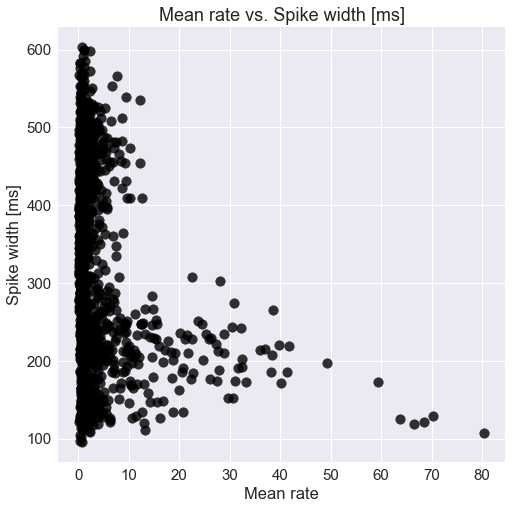

In [13]:
sns.set(font_scale=1.5)
plt.figure(figsize=(8,8))
plt.scatter(data.mean_rate_bnt,data.swidth*1000,s=95,color='k',alpha=.8)
plt.title('Mean rate vs. Spike width [ms]')
plt.xlabel('Mean rate');plt.ylabel('Spike width [ms]')

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


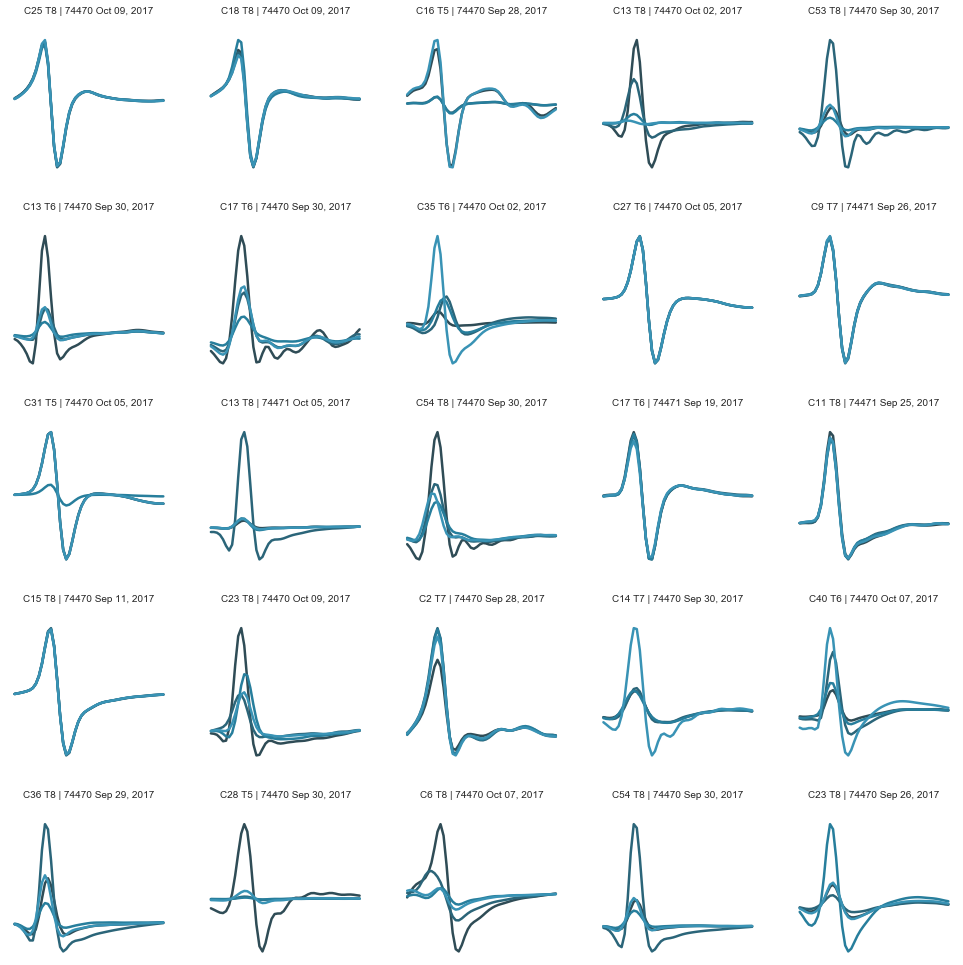

In [14]:
draw_waveforms(data.sort_values(by='swidth',ascending=True), 25, 0)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


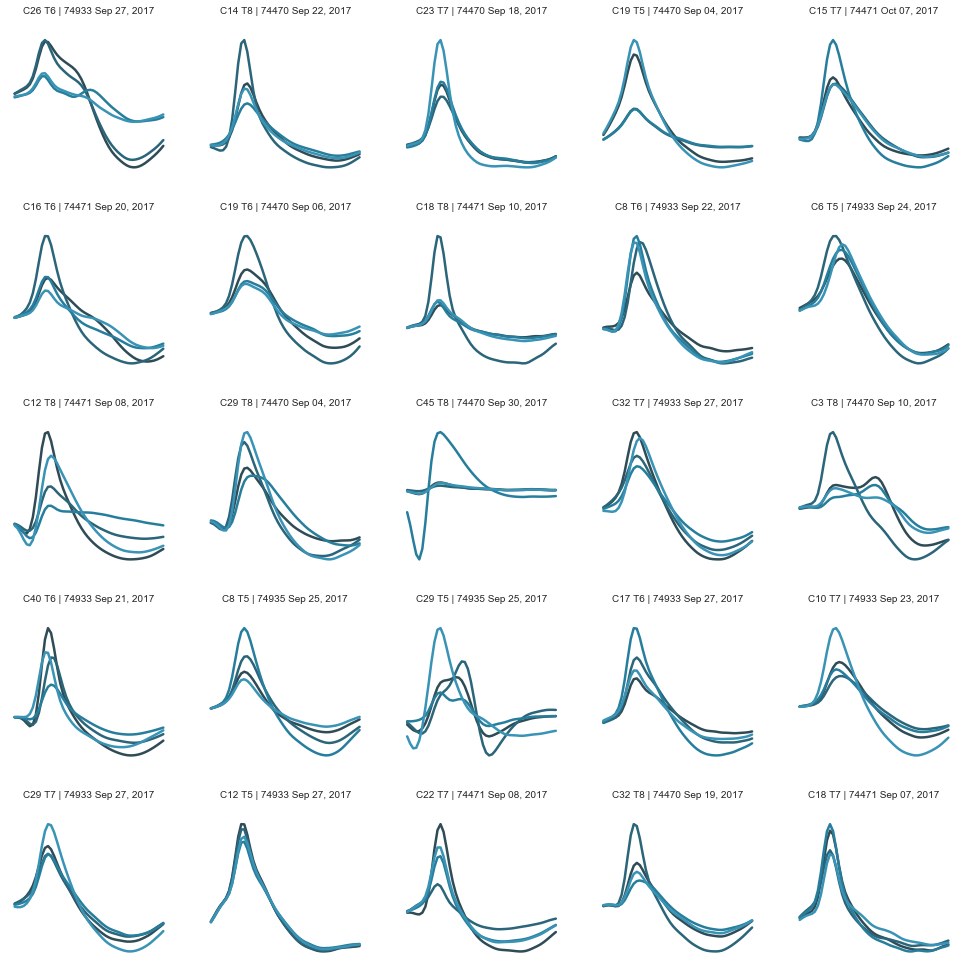

In [15]:
draw_waveforms(data.sort_values(by='swidth',ascending=False), 25, 0)

In [16]:
data.sort_values(by='grid_score_bnt', ascending=False,inplace=True)
data.head(2)

C:\Users\horsto\AppData\Local\Continuum\Miniconda2\envs\ms\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,animal_id,session_name,n_drive_user,session_ts,tetrode_no,cluster_no,spike_no,mean_freq,bins_angle_center_phase,hist_angle_smooth_phase,...,autocorr_bnt,occupancy_map_bnt,hist_angle_smooth_bnt,bins_angle_center_bnt,params_bnt,calbindin_dist_bnt,artefact,idx_max_wf,idx_min_wf,swidth
531,74470,03102017s1,horsto,2017-10-03 16:13:41,5,20,11336.0,7.552298,"[0.0261799387799, 0.0785398163397, 0.130899693...","[0.0615141122813, 0.0694948210492, 0.079682210...",...,"[[0.648982089855, 0.764608063439, 0.8423592785...","[[nan, 1.31847361325, 1.4276787706, 1.45456588...","[13.6455422645, 12.2199516693, 10.8267032486, ...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...",...,0.161097,0.0,10986.0,17090.0,0.127167
73,74470,30092017s2,horsto,2017-09-30 14:28:12,8,55,3372.0,1.873333,"[0.0261799387799, 0.0785398163397, 0.130899693...","[0.126501562519, 0.128092550213, 0.12568271659...",...,"[[-0.165275715917, 0.110824240347, 0.233197326...","[[nan, nan, 1.04825039396, 1.29741210797, 1.40...","[1.24176210257, 1.18013292411, 1.04459072973, ...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...",...,0.795957,0.0,10095.0,24578.0,0.301729


In [40]:
from scipy.signal import spectrogram,welch,detrend,butter,filtfilt,hilbert
from IPython import display
# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
# To work with the cursor data:
conn,cur,status,columns = psql.cursor()
#all_powers = []; all_freqs = []
figure = plt.figure(figsize=(20,20))
summary = pd.DataFrame(columns=['all_powers','all_freqs','animal_id', 'session_ts'])

for no,entry in enumerate(cur):
    df = pd.DataFrame([x for x in entry]).T
    df.columns = [columns]
    
    # work with the data here...
    sample_rate_eeg = 250
    speed_cutoff = 5 
    f, psd = welch(df.iloc[0].lfp_session['eeg_mean'][df.iloc[0].lfp_session['speed']>speed_cutoff], sample_rate_eeg, nperseg=sample_rate_eeg*60)

    theta_range = [5,15]
    theta_peak = f[np.argmax(f==theta_range[0])+np.argmax(psd[(f>=theta_range[0]) & (f<=theta_range[1])])]
    theta_peak_p =  psd[np.argmax(f==theta_range[0])+np.argmax(psd[(f>=theta_range[0]) & (f<=theta_range[1])])]

    summary.loc[no] = [theta_peak_p,theta_peak,df.iloc[0].animal_id,df.iloc[0].session_ts]
    summary_norm = pd.DataFrame()
    summary_norm['all_powers'] = summary['all_powers']/np.max(summary['all_powers'])
    summary_norm['all_freqs'] = summary['all_freqs']/np.max(summary['all_freqs'])
    summary_norm['animal_id'] = summary['animal_id']
    summary_norm['session_ts'] = summary['session_ts']
   
    g = sns.FacetGrid(summary_norm, col="animal_id",col_wrap=3)
    g.map(plt.plot, "all_powers",color='k');
    g.map(plt.plot, "all_freqs",color='g');
        
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [46]:
if status:
    conn.close()
    cur.close() 

In [101]:
from scipy.signal import spectrogram,welch,detrend,butter,filtfilt,hilbert

sample_rate_eeg = 250
speed_cutoff = 5 
f, psd = welch(df.iloc[0].lfp_session['eeg_mean'][df.iloc[0].lfp_session['speed']>speed_cutoff], sample_rate_eeg, nperseg=sample_rate_eeg*60)

theta_range = [5,15]
theta_peak = f[np.argmax(f==theta_range[0])+np.argmax(psd[(f>=theta_range[0]) & (f<=theta_range[1])])]
theta_peak_p =  psd[np.argmax(f==theta_range[0])+np.argmax(psd[(f>=theta_range[0]) & (f<=theta_range[1])])]
print('Theta peak freq: {:.2f}'.format(theta_peak))
print('Theta peak power: {:.2f}'.format(theta_peak_p))

Theta peak freq: 8.48
Theta peak power: 2328.14


(2, 45)

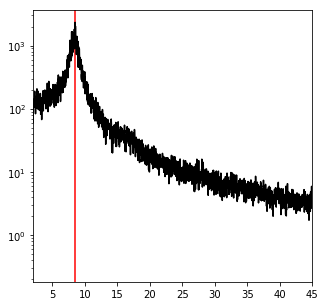

In [105]:
figure =plt.figure(figsize=(5,5))
plt.axvline(x=theta_peak,color='r')
plt.semilogy(f,psd,'k')
plt.xlim(2,45)

In [385]:
base_dataframe = psql.data()

In [386]:
base_dataframe.tail()

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,sparsity_bnt,tc_stats_peakdirection_bnt,borderscore_bnt,params_bnt,isi_stats_percent_bursts,isi_stats_contam,isi_stats_contam_perc
943,8,71461,horsto,2017-08-08 09:03:23,6,08082017s1,0.955153,307.5,0.405411,...,5.283094,16.0,0.318979
944,8,71461,horsto,2017-08-08 09:03:23,7,08082017s1,0.822678,148.5,0.373679,...,1.647655,1.0,0.126743
945,8,71461,horsto,2017-08-08 09:03:23,11,08082017s1,0.883810,229.5,0.128542,...,1.236559,6.0,0.322581
946,8,71461,horsto,2017-08-08 09:03:23,12,08082017s1,0.898564,184.5,0.405359,...,2.673476,13.0,0.390508
947,8,71461,horsto,2017-08-15 08:43:58,2,15082017s1,0.899803,274.5,0.450746,...,0.854701,2.0,0.189934


In [374]:
base_dataframe.tetrode_no.unique()

array([4, 3, 2, 1], dtype=int64)

In [375]:
base_dataframe[base_dataframe.tetrode_no == 1]

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,theta_mean_phase_bnt,theta_strength_bnt,sparsity_bnt,tc_stats_peakdirection_bnt,borderscore_bnt
11,1,58907,torstsl,2017-08-16 11:28:10,2,16082017,"[2.42009632893, 2.34001227608, 2.66097934806, ...","[0.351804197784, 0.352368092132, 0.34442306649...",0.729485,322.5,0.374117
12,1,58907,torstsl,2017-08-16 11:28:10,46,16082017,"[1.49289035824, 1.37918518771, 2.01864892522, ...","[0.113607709095, 0.117073993538, 0.09384338193...",0.643678,328.5,0.414565
13,1,58907,torstsl,2017-08-16 11:28:10,47,16082017,"[-0.661788550803, -0.665175015952, -0.76568801...","[0.0532196699146, 0.0547483309928, 0.046997372...",0.953245,313.5,0.461818
14,1,58907,torstsl,2017-08-16 11:28:10,48,16082017,"[1.90945468229, 1.84162015808, 2.3673039872, 1...","[0.113973655079, 0.108734091915, 0.09810337801...",0.642991,85.5,-0.247493
18,1,58907,torstsl,2017-08-14 11:38:33,88,14082017,"[2.38757033395, 2.3371162178, 2.86294407801, 2...","[0.288483671743, 0.286425795384, 0.16163992312...",0.954244,106.5,0.555432
19,1,58907,torstsl,2017-08-14 11:38:33,98,14082017,"[1.37324192643, 1.31621677532, 2.51932256444, ...","[0.04316806697, 0.0445354380043, 0.03864474881...",0.945919,19.5,0.569166
20,1,58907,torstsl,2017-08-14 11:38:33,99,14082017,"[2.06195179844, 1.98238518935, 3.01298161233, ...","[0.122760422433, 0.125103372879, 0.07046467084...",0.937925,112.5,0.546664
21,1,58907,torstsl,2017-08-14 11:38:33,100,14082017,"[-1.54854400097, -1.6414179116, -0.61684189209...","[0.0950383220427, 0.0929647293537, 0.023713916...",0.844479,82.5,0.575805
36,1,58907,torstsl,2017-08-15 12:06:00,40,15082017,"[0.14382232728, 0.0352146494725, 0.46359729332...","[0.195846863557, 0.179634897453, 0.12786176190...",0.745443,301.5,-0.137487
37,1,58907,torstsl,2017-08-15 12:06:00,46,15082017,"[2.05098347446, 1.98120462357, 2.60960973743, ...","[0.0905378885367, 0.0896904237247, 0.085570157...",0.900694,307.5,0.402178


In [243]:
infs = base_dataframe[pd.isnull(base_dataframe.sparsity_bnt)]

In [244]:
infs

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,maxima_wf,bin_size,spiketimes_cluster_bnt,theta_mean_phase_bnt,...,coherence_bnt,gridstats_spacing_bnt,gridstats_ellipse_theta_bnt,calbindin_bnt,speedscore_bnt,autocorr_bnt,tc_stats_mvl_bnt,occupancy_map_bnt,informationcontent_bnt,meanrate_outside_fields_bnt
0,1,70110,davidcr,2016-11-12 11:26:10,20,12112016s1,"{0: 76.2756122801, 1: 88.4867195585, 2: 62.271...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,T4743,davidcr,2016-11-09 14:39:15,16,09112016s1,"{0: 113.383347577, 1: 13.4154559883, 2: 13.086...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,T4743,davidcr,2016-11-09 14:39:15,17,09112016s1,"{0: 111.95508068, 1: 43.1107719145, 2: 14.9369...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,70110,davidcr,2016-11-06 15:07:17,17,06112016s1,"{0: 105.775840203, 1: 81.2285986049, 2: 53.449...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,70110,davidcr,2016-11-12 11:26:10,6,12112016s1,"{0: 55.4535299374, 1: 55.3346738159, 2: 81.345...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,70110,davidcr,2016-11-12 11:26:10,17,12112016s1,"{0: 97.6481940377, 1: 26.8730194488, 2: 23.247...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,70110,davidcr,2016-11-06 15:07:17,32,06112016s1,"{0: 47.3327956989, 1: 7.77956989247, 2: 56.573...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,70110,davidcr,2016-11-06 15:07:17,34,06112016s1,"{0: 22.3271895985, 1: 8.58479782826, 2: 103.64...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,70110,davidcr,2016-11-12 11:26:10,3,12112016s1,"{0: 29.1710565256, 1: 7.00266350991, 2: 44.612...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,70110,davidcr,2016-11-12 11:26:10,18,12112016s1,"{0: 75.8262563303, 1: 7.16127775614, 2: 32.799...",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
base_dataframe.dropna(subset=['theta_mean_phase_bnt','theta_strength_bnt','phase_stats_mean','phase_stats_mvl'], inplace=True)

In [278]:
len(base_dataframe)

1119

In [17]:
plt.scatter([np.mean(x) for x in base_dataframe.theta_mean_phase_bnt], base_dataframe.phase_stats_mean,s=4,alpha=.5,color='k')

NameError: name 'base_dataframe' is not defined

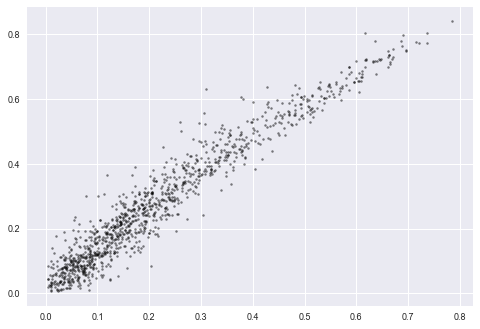

In [280]:
plt.scatter([np.mean(x) for x in base_dataframe.theta_strength_bnt], base_dataframe.phase_stats_mvl,s=4,alpha=.5,color='k')

In [27]:
base_dataframe = data.copy()
base_dataframe.sort_values(by='grid_score_bnt',ascending=False,inplace=True)

In [28]:
base_dataframe['theta_strength_bnt_mean'] = [np.mean(x) for x in base_dataframe.theta_strength_bnt]
#base_dataframe.sort_values(by='theta_strength_bnt_mean',ascending=True,inplace=True)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


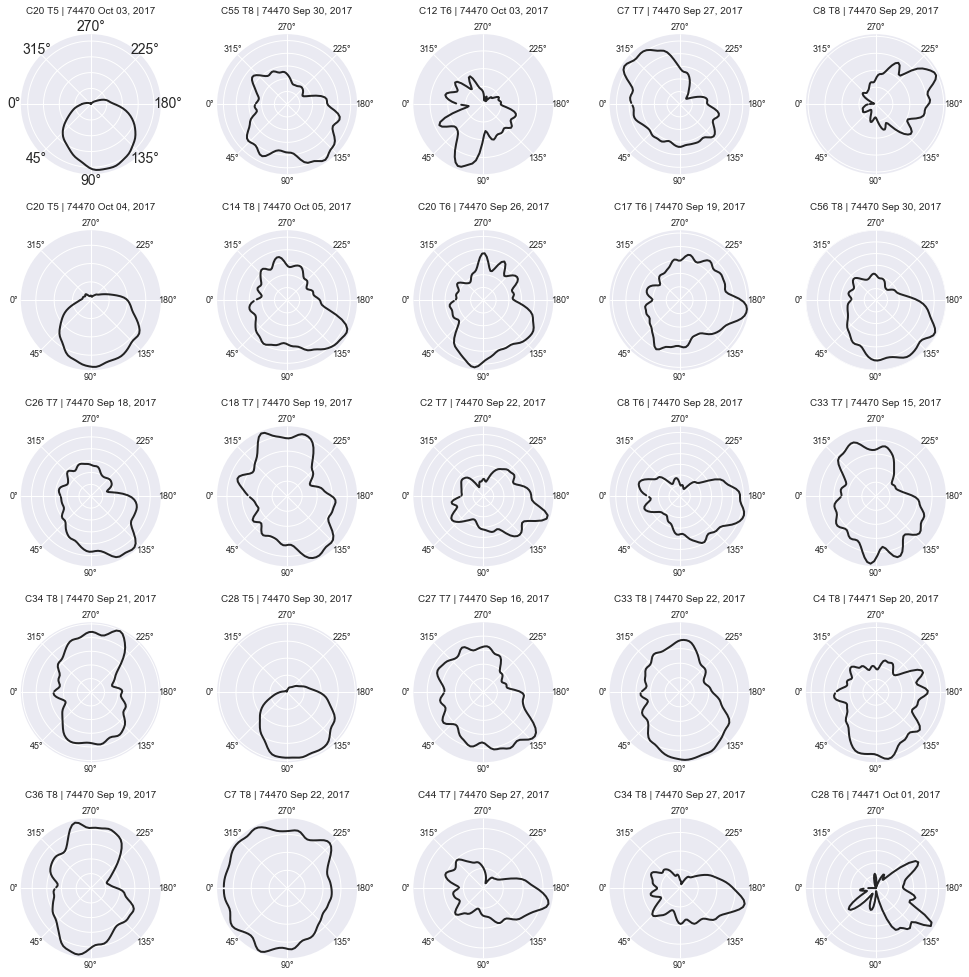

In [29]:
draw_tuning_curves(base_dataframe,['bins_angle_center_phase','hist_angle_smooth_phase'],25,0,'W')

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


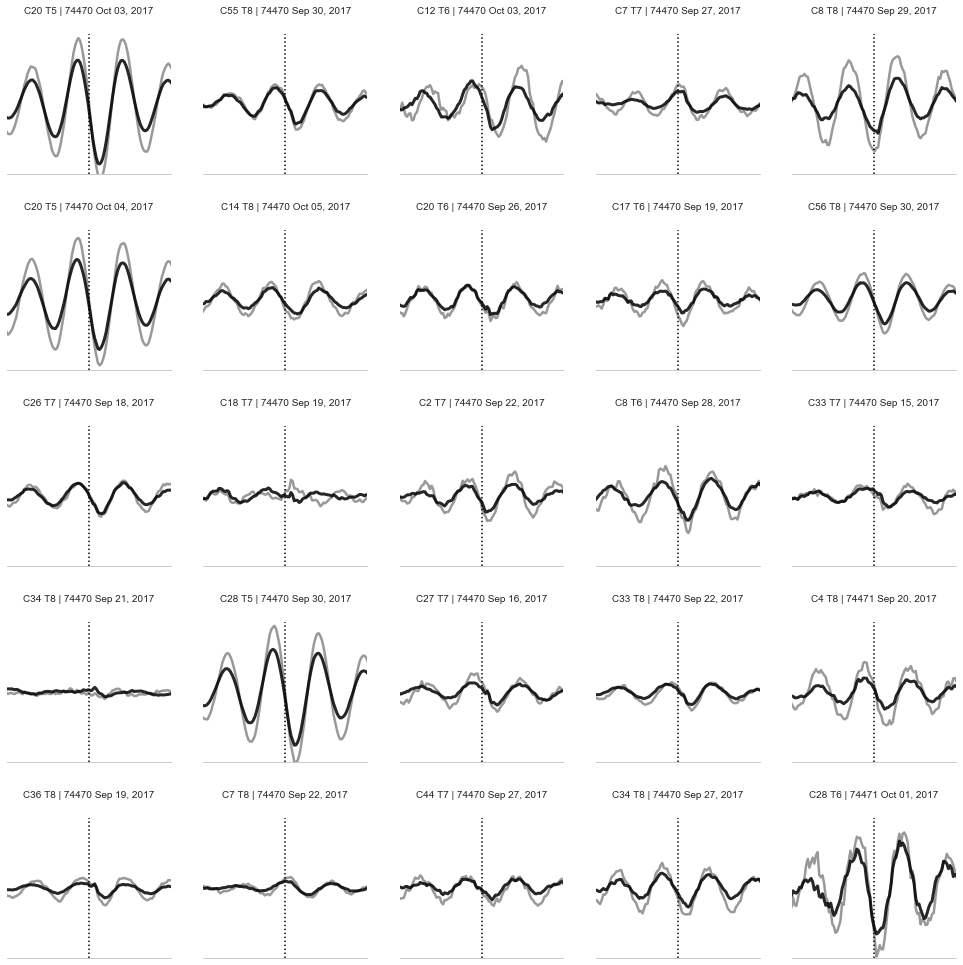

In [30]:
draw_spiket_LFP(base_dataframe,25,0,sample_rate=250.)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


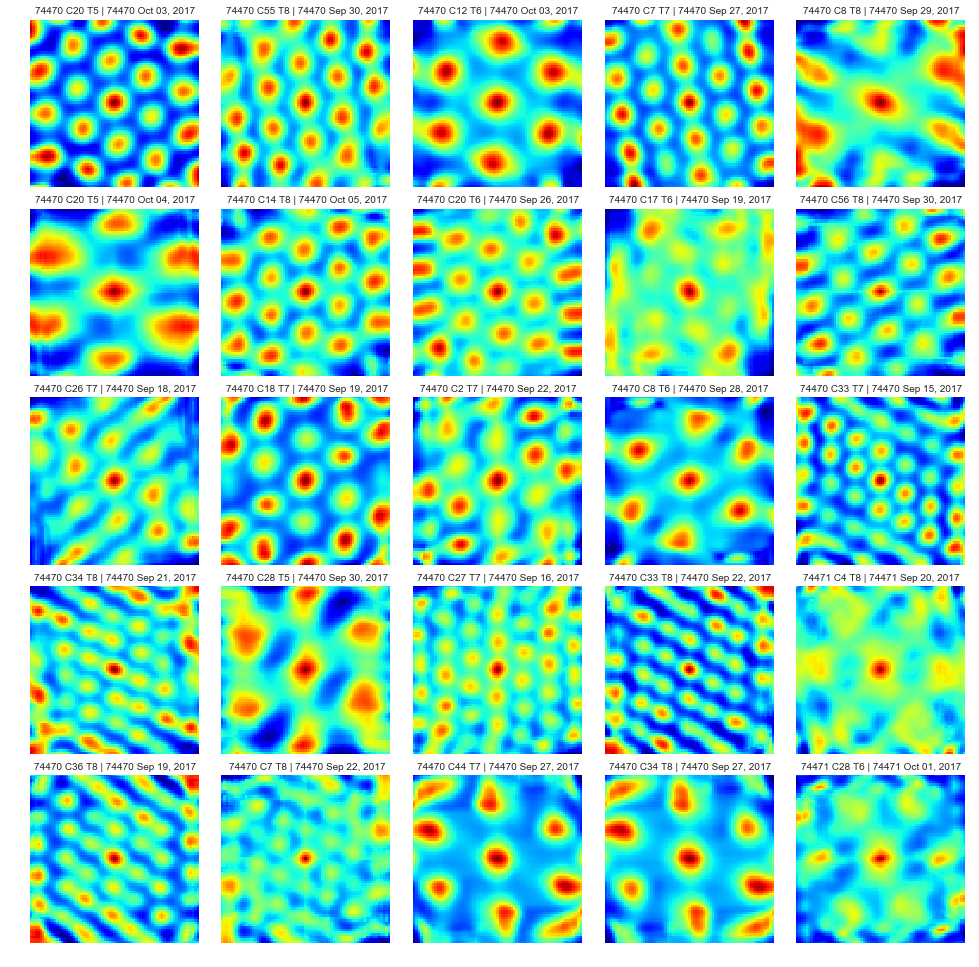

In [31]:
draw_ratemaps(base_dataframe,'autocorr_bnt',25,0)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


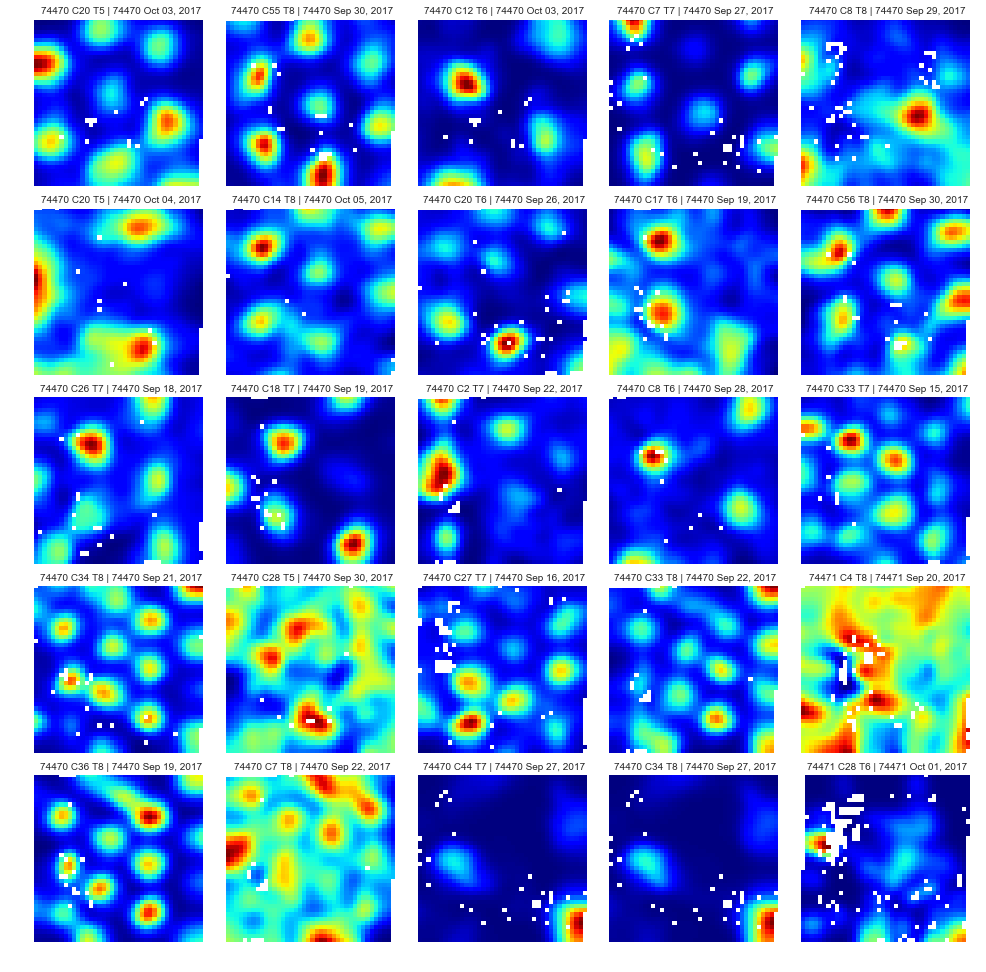

In [34]:
draw_ratemaps(base_dataframe,'masked_ratemap',25,0)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


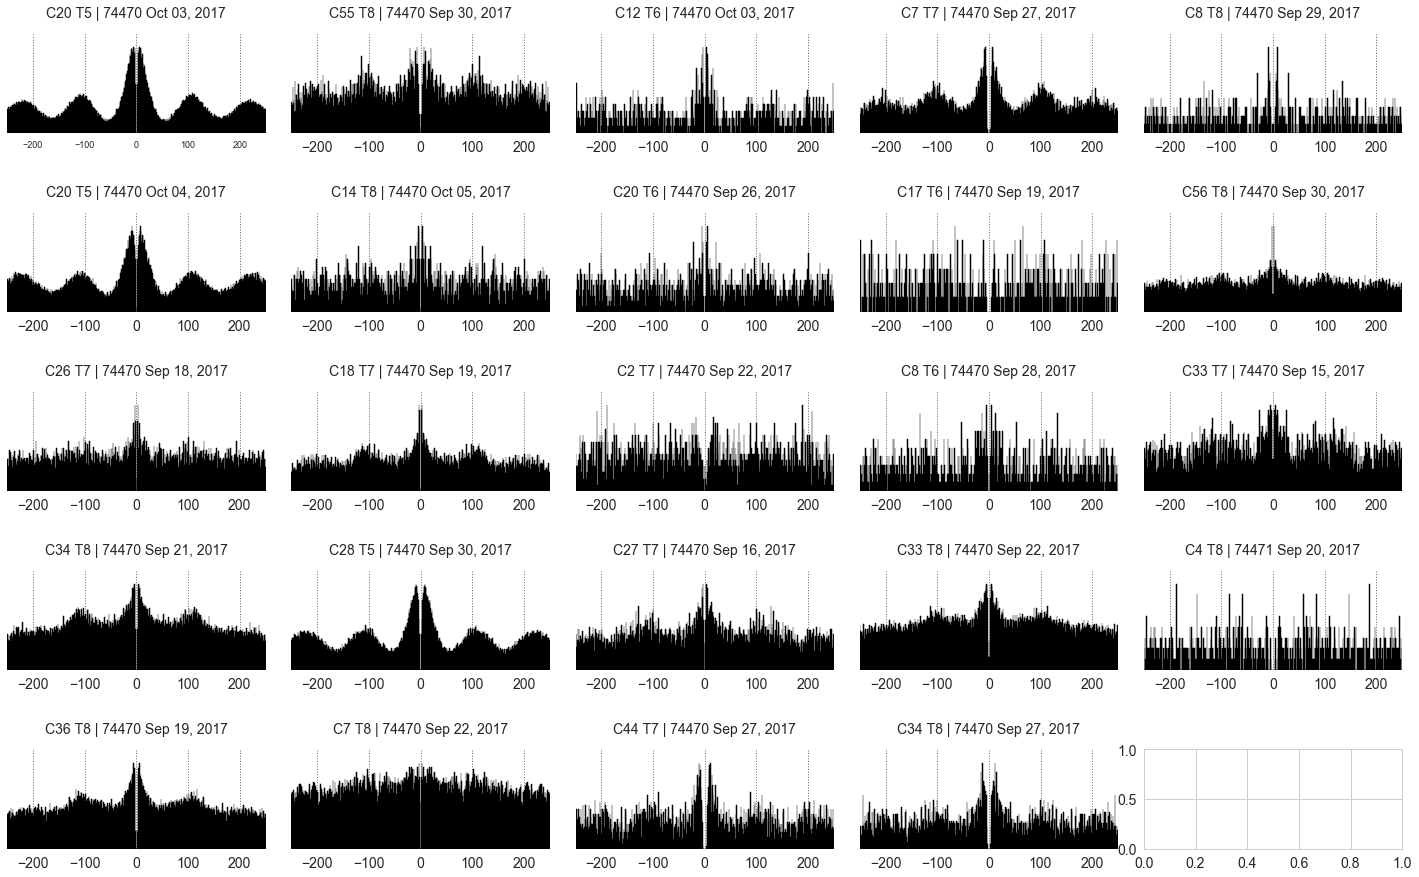

In [33]:
draw_auto_corrs(base_dataframe,25,0)

In [319]:
for no in xrange(base_dataframe.shape[0]):
    plt.plot(base_dataframe.mean_wf.iloc[no][0])
    # work with the data here...
    
plt.show()

AttributeError: 'DataFrame' object has no attribute 'mean_wf'

In [ ]:
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(121)
ax1.scatter(base_dataframe.theta_strength_bnt_mean,base_dataframe.phase_stats_mvl,s=2,c='k',alpha=.5)
ax1.set_title('Theta strength (MVL)')
ax1.set_xlabel('BNT'),ax1.set_ylabel('KLUSTA')

ax2 = figure.add_subplot(122)
ax2.scatter(base_dataframe.theta_mean_phase_bnt_mean,base_dataframe.phase_stats_mean,s=2,c='k',alpha=.5)
ax2.set_title('Theta phase')
ax2.set_xlabel('BNT'),ax2.set_ylabel('KLUSTA')


In [ ]:
base_dataframe.columns

In [ ]:
base_dataframe.sort_values(by='session_ts', ascending=False).head(4)

In [ ]:
len(base_dataframe)

In [ ]:
np.sum(pd.isnull(base_dataframe.calbindin_bnt))

In [ ]:
base_dataframe[(pd.isnull(base_dataframe.calbindin_bnt) == True)].animal_id.unique()

In [ ]:
#array(['70644', '71343', '72255', '72254', '70645', '70261', '59384',
#       '72257', '71379', '72878', '72877', '59381', '59392', '59380',
#       '59394', !'71461', 'T4743', '59389', !'71462', '59379', '59383',
#       '73219', '55949', '57836', '57835', '59399', '73221', '73222',
#       '59388', '7945', 'T4934', '57090', '70110', '57837', '56814',
#       '57089'], dtype=object)

In [ ]:
base_dataframe[(pd.isnull(base_dataframe.calbindin_bnt) == True) & (base_dataframe.animal_id == '72255')].session_name

In [ ]:
base_dataframe.sort_values(by='grid_score',ascending=False,inplace=True)

In [ ]:
draw_ratemaps(base_dataframe,'masked_ratemap',25,25)

In [ ]:
base_dataframe.tc_stats_mvl_bnt

In [ ]:
base_dataframe.sort_values(by='tc_stats_mvl_bnt',ascending=False,inplace=True)


Generating plot ...


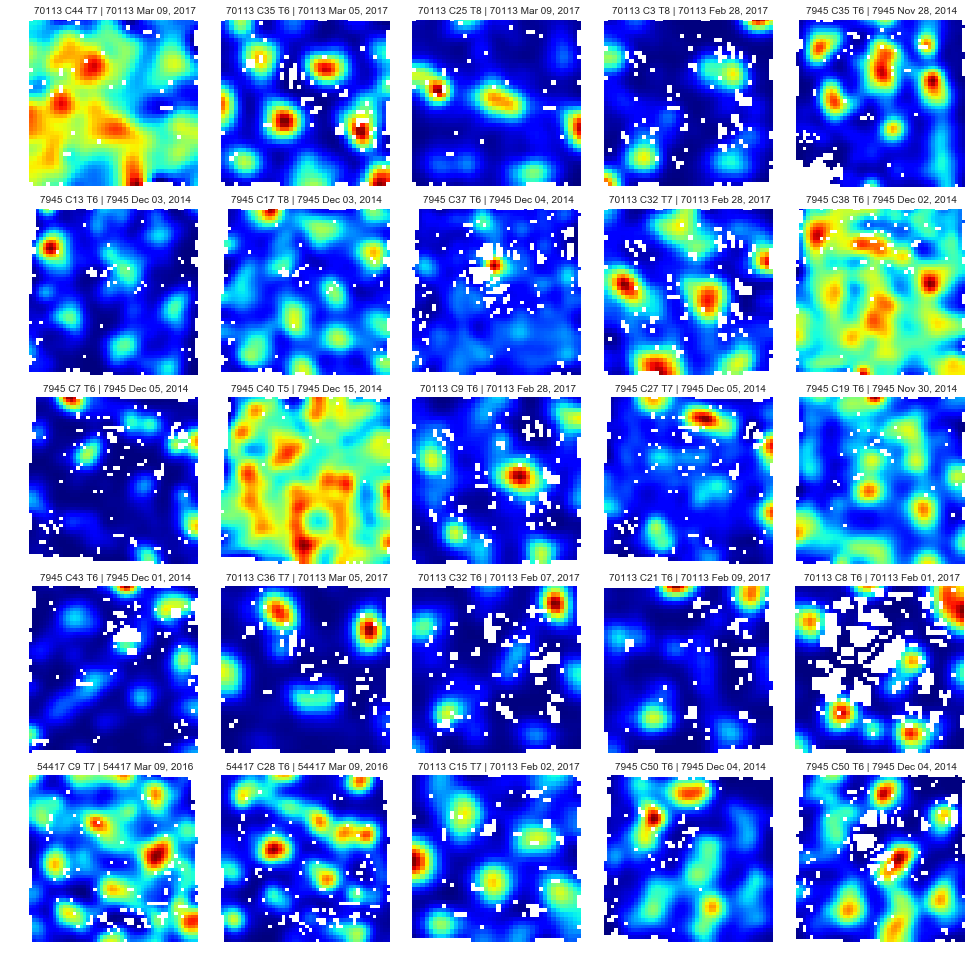

In [38]:
draw_ratemaps(base_dataframe,'masked_ratemap_bnt',25,0)

In [ ]:
draw_tuning_curves(base_dataframe,['bins_angle_center_bnt','hist_angle_smooth_bnt'],25,0,'W')

In [ ]:
figure = plt.figure(figsize=(15,6))
ax = figure.add_subplot(121)
ax.scatter(base_dataframe.grid_score,base_dataframe.grid_score_bnt,s=20,c='k')
ax.set_xlabel('KLUSTA')
ax.set_ylabel('BNT')
ax.set_title('Gridscore')
ax2 = figure.add_subplot(122)
ax2.scatter(base_dataframe.tc_stats_mvl,base_dataframe.tc_stats_mvl_bnt,s=20,c='k')
ax2.set_title('MVL')
ax2.set_xlabel('KLUSTA')
ax2.set_ylabel('BNT')

In [ ]:
list_tables_lookup = {'lfp_tb':'LFP_dict','tracking_tb':'pos_dict','spiketimes_tracking_tb':'spiketimes_dict',
        'phase_tuning_tb':'phase_tuning_dict','ISI_tb':'ISI_dict',
        'st_autocorr_tb':'autocorr_dict','hd_tuning_tb':'hd_tuning_dict','ratemaps_tb':'ratemaps_dict','autocorr_gs_tb':'autocorr_gs_dict','waveforms_tb':'waveforms_dict',
        'stimulus_tb':'stimulus_dict','stimulus_mat_tb':'stimulus_mat_dict','BNT_scores_tb':'bnt_scores_dict'}



In [ ]:
base_dataframe.head()

In [ ]:
len(base_dataframe.cluster_no[base_dataframe.cluster_no == 0])

In [ ]:
base_dataframe.sort_values('cluster_no',ascending=True, inplace=True)

In [ ]:
#base_dataframe = base_dataframe[pd.isnull(base_dataframe.spiket_tracking_session) == False]

In [ ]:
base_dataframe.head(2)

In [ ]:
(pd.isnull(base_dataframe.spiket_tracking_session)).all()

In [ ]:
len(base_dataframe)

In [ ]:
base_dataframe.animal_id.unique()

### tests ... 

In [ ]:
params = config()

#### previous functions

In [ ]:
selection =('bins_angle_center','hist_angle_smooth','tc_stats_var','tc_stats_mean','tc_stats_mvl')
table = 'hd_tuning_tb'
filter_ =  "AND session_name NOT LIKE '%las%' AND session_name NOT LIKE '%obj%'"

### test

In [ ]:
selected_tb_dict = dict()
tabs_tables = ['lfp_tb','tracking_tb','spiketimes_tracking_tb','phase_tuning_tb','ISI_tb',
'st_autocorr_tb','hd_tuning_tb','ratemaps_tb','autocorr_gs_tb','waveforms_tb',
'stimulus_tb','stimulus_mat_tb','BNT_scores_tb']
for tab in tabs_tables:
    selected_tb_dict[tab] = [] # set to false at the start (no selection)

In [ ]:
selected_tb_dict['hd_tuning_tb'] = ('tc_stats_var', 'tc_stats_mean','tc_stats_MVL','bins_angle_center','hist_angle_smooth')
selected_tb_dict['ratemaps_tb'] = ('masked_ratemap')

In [ ]:
selected_tb_dict

In [ ]:
tables_to_mine = {k:v for k,v in selected_tb_dict.iteritems() if len(v)>0}

In [ ]:
tables_to_mine

In [ ]:
print('Retrieving data from {}'.format([k for k,v in selected_tb_dict.iteritems() if len(v)>0]))
for tb in tqdm_notebook(tables_to_mine,desc='Mining tables'):
    base_dataframe,count_nans = retrieve_concat(base_dataframe,selected_tb_dict[tb],tb,filter_)

In [ ]:
base_dataframe.head(3)

In [ ]:
base_dataframe.session_ts.unique()

In [ ]:
base_dataframe.head(21)

In [ ]:
draw_ratemaps(base_dataframe,'masked_ratemap',20,0)

In [ ]:
#draw_hd_tuning_curves(base_dataframe,20,0)

### UNDERSTAND WHAT IS HAPPENING HERE

In [ ]:
def generate_sql_query(selection, table, c_entry_T, filter_):
    '''
    Feed this a 'selection' (SELECT)
    'table' (FROM), retrieval cue (derived from c_entry_T, WHERE)
    and additional filter (filter_, WHERE),
    then query database with that
    '''
    if ('cluster_no' in c_entry_T.columns) and ('tetrode_no' in c_entry_T.columns):
        # filters for clusters  ...
        if 'session_name' not in c_entry_T.columns:
            sql = "SELECT {}, session_name FROM {} WHERE animal_id = '{}' AND session_ts = '{}' AND \
            cluster_no = {} AND tetrode_no = {} {}".format(str(selection).replace("(","").replace(")","").replace("'","").rstrip(','),
            table, c_entry_T.animal_id.values[0], c_entry_T.session_ts.values[0],c_entry_T.cluster_no.values[0],
                                                           c_entry_T.tetrode_no.values[0],filter_)
        else:
            sql = "SELECT {} FROM {} WHERE animal_id = '{}' AND session_ts = '{}' AND session_name = '{}' AND \
            cluster_no = {} AND tetrode_no = {} {}".format(str(selection).replace("(","").replace(")","").replace("'","").rstrip(','),
            table, c_entry_T.animal_id.values[0], c_entry_T.session_ts.values[0], c_entry_T.session_name.values[0], c_entry_T.cluster_no.values[0],
                                                           c_entry_T.tetrode_no.values[0],filter_)
    else:
        # filters for sessions ...
        if 'session_name' not in c_entry_T.columns:
            sql = "SELECT {}, session_name,cluster_no,tetrode_no FROM {} WHERE animal_id = '{}' AND session_ts = '{}' {}".format(str(selection).replace("(","").replace(")","").replace("'","").rstrip(','),
            table, c_entry_T.animal_id.values[0], c_entry_T.session_ts.values[0],filter_)
        else:
            sql = "SELECT {}, cluster_no,tetrode_no FROM {} WHERE animal_id = '{}' AND session_ts = '{}' and session_name = '{}' {}".format(str(selection).replace("(","").replace(")","").replace("'","").rstrip(','),
            table, c_entry_T.animal_id.values[0], c_entry_T.session_ts.values[0],c_entry_T.session_name.values[0],filter_)
    #print(sql)
    return sql

In [ ]:
def retrieve_concat(base_dataframe,selection,table,filter_):
            new_df = pd.DataFrame()
            count_nans = 0

            for i in tqdm_notebook(xrange(len(base_dataframe)),desc=table):
                c_entry = base_dataframe.iloc[i] # gets series obj
                c_entry_T = pd.DataFrame(c_entry).T
                c_entry_T.reset_index(inplace=True,drop=True)

                # generate sql query string
                sql = generate_sql_query(selection, table, c_entry_T, filter_)

                # query database ...
                c_sql = pd.read_sql_query(sql, psycopg2.connect(**params), index_col=None)

                if len(c_sql) == 0:
                    count_nans += 1
                    c_join = pd.concat([c_entry_T, c_sql],axis=1) # horizontally join the two entries
                    new_df = pd.concat([new_df,  c_join]) # vertically join it with the rest
                for c in xrange(len(c_sql)):
                    c_sql_reset = pd.DataFrame(c_sql.iloc[c]).T
                    c_join = pd.concat([c_entry_T, c_sql_reset.reset_index(drop=True)],axis=1) # horizontally join the two entries
                    new_df = pd.concat([new_df,  c_join]) # vertically join it with the rest

            new_df.reset_index(inplace=True,drop=True)
            return new_df,count_nans

In [ ]:
selected_tb_dict = dict()
tabs_tables = ['lfp_tb','tracking_tb','spiketimes_tracking_tb','phase_tuning_tb','ISI_tb',
'st_autocorr_tb','hd_tuning_tb','ratemaps_tb','autocorr_gs_tb','waveforms_tb',
'stimulus_tb','stimulus_mat_tb','BNT_scores_tb']
for tab in tabs_tables:
    selected_tb_dict[tab] = [] # set to false at the start (no selection)

In [ ]:
selected_tb_dict

In [ ]:
selected_tb_dict['BNT_scores_tb'] = ('borderScore',)

In [ ]:
df = base_dataframe

In [ ]:
tables_to_mine = {k:v for k,v in selected_tb_dict.iteritems() if len(v)>0}
filter_  = ""
print('from {}'.format([k for k,v in selected_tb_dict.iteritems() if len(v)>0]))
#for tb in tqdm_notebook(tables_to_mine,desc='Mining tables'):
#    df,count_nans = retrieve_concat(df,selected_tb_dict[tb],tb,filter_)

In [ ]:
df.head()

Roadmap:

- get list of primary keys for every selected table
- sort by length of primary keys (number of elements)
- FROM statement: start with element with longest number of elements



Try to construct postgres queries from scratch ... 

In [ ]:
str([x.strip('"\'') for x in selected_animal_ids]).replace('[','{').replace(']','}').replace('\'','')

In [ ]:
#selected_tb_dict = {'tracking_tb': ('head_offset',), 'autocorr_gs_tb': ('grid_score',), 'BNT_scores_tb': ('informationContent', 'gridStats_Ellipse_3', 'hdPeakRate', 'gridStats_Ellipse_1', 'gridStats_Ellipse_5', 'gridStats_Ellipse_4', 'gridStats_EllipseTheta', 'numFields', 'meanDirection', 'stabilityHalf', 'thetaindex', 'meanRate', 'coherence', 'peakDirection', 'gridStats_Orientation_3', 'fieldMain', 'sparsity', 'gridScore', 'gridStats_Orientation_2', 'gridStats_Orientation_1', 'borderScore', 'peakRate', 'mvl', 'gridStats_Ellipse_2', 'informationRate', 'meanRateOutsideFields', 'selectivity', 'speedscore', 'gridStats_Spacing_2', 'gridStats_Spacing_3', 'gridStats_Spacing_1'), 'lfp_tb': [], 'spiketimes_tracking_tb': [], 'stimulus_tb': [], 'stimulus_mat_tb': [], 'ISI_tb': [], 'hd_tuning_tb': [], 'st_autocorr_tb': [], 'phase_tuning_tb': [], 'ratemaps_tb': [], 'waveforms_tb': ('mean_wf', 'maxima_wf')}
#selected_tb_dict = {'tracking_tb': [], 'autocorr_gs_tb': [], 'BNT_scores_tb': [], 'lfp_tb': ('theta_freq',), 'spiketimes_tracking_tb': [], 'stimulus_tb': [], 'stimulus_mat_tb': [], 'ISI_tb': [], 'hd_tuning_tb': [], 'st_autocorr_tb': [], 'phase_tuning_tb': [], 'ratemaps_tb': [], 'waveforms_tb': ('mean_wf', 'maxima_wf', 'std_wf')}
selected_tb_dict = {'tracking_tb': ('px_to_cm',), 'autocorr_gs_tb': [], 'BNT_scores_tb': [], 'lfp_tb': [], 'spiketimes_tracking_tb': [], 'stimulus_tb': ('counter_stimuli',), 'stimulus_mat_tb': [], 'ISI_tb': [], 'hd_tuning_tb': [], 'st_autocorr_tb': [], 'phase_tuning_tb': [], 'ratemaps_tb': [], 'waveforms_tb': ('maxima_wf',)}
selected_tb_dict = {'tracking_tb': ('head_offset', 'head_offset_var', 'px_to_cm'), 'autocorr_gs_tb': [], 'BNT_scores_tb': [], 'lfp_tb': ('theta_freq',), 'spiketimes_tracking_tb': [], 'stimulus_tb': [], 'stimulus_mat_tb': [], 'ISI_tb': [], 'hd_tuning_tb': [], 'st_autocorr_tb': [], 'phase_tuning_tb': [], 'ratemaps_tb': [], 'waveforms_tb': []}
selected_tb_dict = {'tracking_tb': ('px_to_cm',), 'autocorr_gs_tb': [], 'BNT_scores_tb': [], 'lfp_tb': [], 'spiketimes_tracking_tb': [], 'stimulus_tb': [], 'stimulus_mat_tb': [], 'ISI_tb': [], 'hd_tuning_tb': [], 'st_autocorr_tb': [], 'phase_tuning_tb': [], 'ratemaps_tb': [], 'waveforms_tb': []}

selected_tb_dict = {'tracking_tb': ('px_to_cm',), 'autocorr_gs_tb': [], 'BNT_scores_tb': ('meanRate',), 'lfp_tb': ('theta_freq',), 'spiketimes_tracking_tb': [], 'stimulus_tb': [], 'stimulus_mat_tb': [], 'ISI_tb': [], 'hd_tuning_tb': [], 'st_autocorr_tb': [], 'phase_tuning_tb': [], 'ratemaps_tb': ('masked_ratemap',), 'waveforms_tb': ('mean_wf', 'maxima_wf', 'std_wf')}

In [ ]:
tables_to_mine = {k:v for k,v in selected_tb_dict.iteritems() if len(v)>0}

In [ ]:
tables_to_mine

In [ ]:
params = config()

In [ ]:
def get_primary_keys(table):
        sql = "SELECT a.attname, format_type(a.atttypid, a.atttypmod) AS data_type FROM pg_index i JOIN pg_attribute a ON \
        a.attrelid = i.indrelid AND a.attnum = ANY(i.indkey) WHERE i.indrelid = '{}'::regclass \
        AND    i.indisprimary;".format(table)
        c_sql = pd.read_sql_query(sql, psycopg2.connect(**params), index_col=None)
        return c_sql.attname.values.tolist()

In [ ]:
def order_tabs_sql(tables_to_mine):
            '''
            To retrieve data from database I have to order the
            elements (tables) I want to retrieve from in order of their
            primary keys such that the tables with lowest number of primary keys
            come last.
            '''
            lengths = []
            all_primary_keys = []
            all_entries = []

            for tab in tables_to_mine:
                primary_keys = get_primary_keys(tab)
                all_primary_keys.append(primary_keys)
                lengths.append(len(primary_keys))
                all_entries.append(tables_to_mine[tab])

            print(lengths)
            unique_primaries = set([item for sublist in all_primary_keys for item in sublist])
            all_entries = [item for sublist in all_entries for item in sublist]
            sorted_dict = dict()
            for no,idx in enumerate(np.argsort(np.array(lengths))[::-1]):
                sorted_dict[no] = [k for k,v in tables_to_mine.iteritems()][idx]

            return sorted_dict,list(unique_primaries),all_entries

In [ ]:
sorted_dict,unique_primaries,all_entries = order_tabs_sql(tables_to_mine)

In [ ]:
lengths = [6, 4, 6, 4, 6]
np.argsort(np.array(lengths))

In [ ]:
sorted_dict

In [ ]:
print(sorted_dict,unique_primaries,all_entries)

In [ ]:
"SELECT {} ".format(str(unique_primaries).replace("[","").replace("]","").replace("'","").rstrip(','))

In [ ]:
"{}".format(str(all_entries).replace("[","").replace("]","").replace("'","").rstrip(','))

In [ ]:
for tb in sorted_dict:
    print(sorted_dict[tb])

In [ ]:
"FROM"

In [ ]:
"WHERE animal_id = '56276'"

In [ ]:
# try to combine into one: 
sql = "SELECT {}, {} FROM {} WHERE animal_id = '71710'".format(str(unique_primaries).replace("[","").replace("]","").replace("'","").rstrip(','),str(all_entries).replace("[","").replace("]","").replace("'","").rstrip(','),
                            table_str)

In [ ]:
sql

In [ ]:
c_sql = pd.read_sql_query(sql, psycopg2.connect(**params), index_col=None)

In [ ]:
c_sql.columns

In [ ]:
c_sql[c_sql.session_name == '27092016s1']

In [ ]:
c_sql